In [1]:
!pip install PyPDF2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 4.1 MB/s eta 0:00:00


In [2]:
!pip install google-generativeai

IMAGE EXTRACTION (DO NOT RESTART SESSION AFTER THIS CODE CELL EXECUTES)

In [3]:
!pip install "unstructured[pdf]"

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 17.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.2/48.2 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.8/48.8 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 514.6/514.6 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 28.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
!apt-get install -y tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 2s (2,621 kB/s)
Selecting previously unselected package tesseract-ocr-eng.
(Reading database ... 124950 files and directories currently installed.)
Preparing to unpack .../tesseract-ocr-

In [5]:
!apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 18 not upgraded.
Need to get 186 kB of archives.
After this operation, 696 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.6 [186 kB]
Fetched 186 kB in 1s (205 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 124997 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.6_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.6) ...
Setting up poppler-utils (22.02.0-2ubuntu0.6) ...
Processing triggers for man-db (2.10.2-1) ...


In [29]:
from unstructured.partition.pdf import partition_pdf

output_path = "extracted_images_4"
file_path = 'sdn.pdf'

chunks = partition_pdf(
    filename=file_path,
    infer_table_structure=True,
    strategy="hi_res",

    extract_image_block_types=["Image"],
    image_output_dir_path=output_path,

    extract_image_block_to_payload=False,  # Set this to False to save images as files

    chunking_strategy="by_title",
    max_characters=10000,
    combine_text_under_n_chars=2000,
    new_after_n_chars=6000,
)


In [30]:
elements = chunks[3].metadata.orig_elements
chunk_images = [el for el in elements if 'Image' in str(type(el))]
chunk_images[0].to_dict()

{'type': 'Image',
 'element_id': '299cc1fa-45c7-4689-89e1-9ea6081dfa6c',
 'text': 'RF Base Incoming Data Meta Classifier - LR JoT Device DT e Le IH Le] Le IH Le] 7 22] 3 20ep0 Le Le] Le Le] Models Social ut Network Network ao Stacking Classifier Default “G7 c Le Le] Le Le] Mainframe Web lot SDN Network SDN Clustering',
 'metadata': {'detection_class_prob': 0.927784264087677,
  'coordinates': {'points': ((124.16901397705078, 162.52207946777344),
    (124.16901397705078, 806.70458984375),
    (1563.0244140625, 806.70458984375),
    (1563.0244140625, 162.52207946777344)),
   'system': 'PixelSpace',
   'layout_width': 1654,
   'layout_height': 2339},
  'last_modified': '2025-02-01T06:30:23',
  'filetype': 'PPM',
  'languages': ['eng'],
  'page_number': 3,
  'image_path': '/content/figures/figure-3-1.jpg'}}

In [9]:
pip install sentence-transformers faiss-cpu Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 54.8 MB/s eta 0:00:00


In [31]:
import os
from PIL import Image
import torch
import faiss
from sentence_transformers import SentenceTransformer

# Load the CLIP model
model = SentenceTransformer('clip-ViT-B-32')

# Function to get image embeddings
def get_image_embeddings(image_folder):
    image_paths = []
    embeddings = []

    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(image_folder, filename)
            image_paths.append(image_path)

            # Load and preprocess image
            image = Image.open(image_path).convert("RGB")
            image_embedding = model.encode(image, convert_to_tensor=True)
            embeddings.append(image_embedding)

    return image_paths, torch.stack(embeddings).cpu().numpy()

# Save embeddings to FAISS
def save_embeddings_to_faiss(embeddings, image_paths, faiss_index_path):
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(embeddings)

    # Save mapping of image paths
    with open("image_paths.txt", "w") as f:
        for path in image_paths:
            f.write(f"{path}\n")

    faiss.write_index(index, faiss_index_path)
    print("FAISS index and image paths saved.")

# Main execution
image_folder = "figures"
faiss_index_path = "image_faiss.index"
image_paths, embeddings = get_image_embeddings(image_folder)
save_embeddings_to_faiss(embeddings, image_paths, faiss_index_path)

FAISS index and image paths saved.


In [11]:
pip install transformers faiss-gpu torch torchvision Pillow

ERROR: Could not find a version that satisfies the requirement faiss-gpu (from versions: none)
ERROR: No matching distribution found for faiss-gpu


TESTING IMAGE SIMILARITY SEARCH FOR SAMPLE QUERY

In [32]:
import os
import faiss
import torch
import numpy as np
from PIL import Image
from sentence_transformers import SentenceTransformer

# Load CLIP model
model = SentenceTransformer('clip-ViT-B-32')

# Function to get image embeddings
def get_image_embeddings(image_folder):
    image_paths = []
    embeddings = []

    for filename in sorted(os.listdir(image_folder)):  # Sort for consistency
        if filename.lower().endswith(('png', 'jpg', 'jpeg')):
            image_path = os.path.join(image_folder, filename)
            image_paths.append(image_path)

            # Load and preprocess image
            image = Image.open(image_path).convert("RGB")
            image_embedding = model.encode(image, convert_to_tensor=True)
            embeddings.append(image_embedding)

    return image_paths, torch.stack(embeddings).cpu().numpy()

# Save embeddings to FAISS
def save_embeddings_to_faiss(embeddings, image_paths, faiss_index_path):
    dimension = embeddings.shape[1]
    index = faiss.IndexFlatL2(dimension)
    index.add(embeddings)

    # Save mapping of image paths
    with open("image_paths.txt", "w") as f:
        for path in image_paths:
            f.write(f"{path}\n")

    faiss.write_index(index, faiss_index_path)
    print("FAISS index and image paths saved.")

# Load FAISS and retrieve images based on query
def search_images(query, faiss_index_path, image_paths_file, top_k=5):
    # Load FAISS index
    index = faiss.read_index(faiss_index_path)

    # Load image paths
    with open(image_paths_file, "r") as f:
        image_paths = [line.strip() for line in f.readlines()]

    # Encode query into the same embedding space
    query_embedding = model.encode(query, convert_to_tensor=True).cpu().numpy().reshape(1, -1)

    # Search FAISS index
    distances, indices = index.search(query_embedding, top_k)

    # Return the most relevant images
    results = [(image_paths[i], distances[0][j]) for j, i in enumerate(indices[0])]
    return results

# Main execution
image_folder = "figures"  # Use extracted images folder
faiss_index_path = "image_faiss.index"
image_paths, embeddings = get_image_embeddings(image_folder)
save_embeddings_to_faiss(embeddings, image_paths, faiss_index_path)

# Example Query
query = "PROPOSED ARCHITECTURE IN THIS RESEARCH"
retrieved_images = search_images(query, faiss_index_path, "image_paths.txt", top_k=1)

# Print Results
print("\nRetrieved Images:")
for img_path, score in retrieved_images:
    print(f"{img_path} (Score: {score:.4f})")


FAISS index and image paths saved.

Retrieved Images:
figures/figure-3-1.jpg (Score: 174.1404)


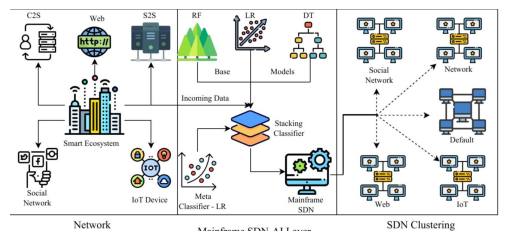

In [33]:
from PIL import Image
import matplotlib.pyplot as plt

image_path = 'figures/figure-3-1.jpg'  #RETRIEVED AS OUTPUT IN THE QUERY ABOVE

try:
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {image_path}")
except Exception as e:
    print(f"An error occurred: {e}")


TEXT EXTRACTION AND PREPROCESSING

In [34]:
import PyPDF2

def extract_text_from_pdf(pdf_path):
    """Extracts and returns structured text from a PDF document."""
    text = ""
    with open(pdf_path, "rb") as file:
        reader = PyPDF2.PdfReader(file)
        for page in reader.pages:
            page_text = page.extract_text()
            if page_text:
                text += page_text + "\n"
    return text

# Example Usage
pdf_file = "sdn.pdf"  # Replace with actual file path
research_text = extract_text_from_pdf(pdf_file)
print(research_text[:1000])  # Print first 1000 characters for verification

FAST : AI-based Network Traffic Analysis and Load
Balancing Framework Underlying SDN Clusters
Drishya Shah, Diya Shah
Department of Comp. Sci. & Engg.
Institute of Technology,
Nirma University, Ahmedabad, India
{22bce088, 22bce080 }@nirmauniac.inFenil Ramoliya, Rajesh Gupta
Department of Comp. Sci. & Engg.
Institute of Technology,
Nirma University, Ahmedabad, India
{21bce244, rajesh.gupta }@nirmauni.ac.inHetal Brijesh Shah
Department of ECE
Dharmsinh Desai University,
Nadiad, Gujarat, India
shahhetal.ec@ddu.ac.in
Sudeep Tanwar
Department of Comp. Sci. & Engg.
Institute of Technology,
Nirma University, Ahmedabad, India
sudeep.tanwar@nirmauni.ac.inHossein Shahinzadeh
Department of Electrical Engg.
Amirkabir University of Technology
Tehran Polytechnic, Tehran, Iran
h.s.shahinzadeh@ieee.orgDeepak Garg
School of Comp. Science and AI,
SR University,
Warangal, Telangana, India
deepak.garg@sru.edu.in
Abstract —In the smart ecosystem environment, critical request
handling is essential for seaml

In [35]:
import re

def split_into_sections(text):
    """Splits research paper text into structured sections based on headings."""
    sections = {}
    current_section = "Introduction"  # Default to Introduction if no heading is found
    sections[current_section] = []

    # Regex pattern for typical research paper headings
    heading_pattern = re.compile(r"(?m)^(Abstract|Introduction|Proposed Approach|Methodology|Dataset|Results|Performance Evaluation|Conclusion|References)", re.IGNORECASE)

    for line in text.split("\n"):
        match = heading_pattern.match(line.strip())
        if match:
            current_section = match.group(0)
            sections[current_section] = []
        sections[current_section].append(line.strip())

    # Join lists into strings for easy processing
    sections = {k: "\n".join(v) for k, v in sections.items()}

    return sections

# Example Usage
structured_sections = split_into_sections(research_text)
for section, content in structured_sections.items():
    print(f"\n===== {section} =====\n{content[:500]}")  # Display first 500 characters for each section


===== Introduction =====
FAST : AI-based Network Traffic Analysis and Load
Balancing Framework Underlying SDN Clusters
Drishya Shah, Diya Shah
Department of Comp. Sci. & Engg.
Institute of Technology,
Nirma University, Ahmedabad, India
{22bce088, 22bce080 }@nirmauniac.inFenil Ramoliya, Rajesh Gupta
Department of Comp. Sci. & Engg.
Institute of Technology,
Nirma University, Ahmedabad, India
{21bce244, rajesh.gupta }@nirmauni.ac.inHetal Brijesh Shah
Department of ECE
Dharmsinh Desai University,
Nadiad, Gujarat, India
shah

===== Abstract =====
Abstract —In the smart ecosystem environment, critical request
handling is essential for seamless network operation. It is
necessary that these requests are forwarded efficiently with low
latency and high scalability as well as security. Software-Defined
Networking (SDN) plays a crucial role in this environment with
its dynamic traffic engineering mechanism, Quality of Service
(QoS) implementation, Fast-intelligent routing, and, Artificial
Intelli

In [15]:
!pip install sentence-transformers faiss-cpu

In [36]:
from sentence_transformers import SentenceTransformer
import numpy as np
import faiss

# Load pre-trained embedding model
embedding_model = SentenceTransformer("all-MiniLM-L6-v2")

def embed_sections(sections):
    """Generates embeddings for research paper sections."""
    section_names = list(sections.keys())
    section_texts = list(sections.values())

    embeddings = embedding_model.encode(section_texts, convert_to_numpy=True)

    # Store embeddings in FAISS Index for retrieval
    index = faiss.IndexFlatL2(embeddings.shape[1])
    index.add(embeddings)

    return section_names, index, embeddings

# Example Usage
section_names, index, embeddings = embed_sections(structured_sections)

MAKING RETRIEVAL FUNCTION FOR TEXT AND SAMPLE TESTCASES

In [37]:
def retrieve_relevant_sections(query, section_names, index, embeddings, top_k=4):
    """Retrieves top-k relevant sections for a given query using FAISS."""
    query_embedding = embedding_model.encode([query], convert_to_numpy=True)

    distances, indices = index.search(query_embedding, top_k)
    relevant_sections = [section_names[i] for i in indices[0]]

    return relevant_sections

# Example Usage
query = "Summarize the methodology of this research"
relevant_sections = retrieve_relevant_sections(query, section_names, index, embeddings)
print("Relevant Sections:", relevant_sections)
def retrieve_relevant_sections(query, section_names, index, embeddings, top_k=3):
    """Retrieves top-k relevant sections for a given query using FAISS."""
    query_embedding = embedding_model.encode([query], convert_to_numpy=True)

    distances, indices = index.search(query_embedding, top_k)
    relevant_sections = [section_names[i] for i in indices[0]]

    return relevant_sections

# Example Usage
query = "Summarize the methodology of this research"
relevant_sections = retrieve_relevant_sections(query, section_names, index, embeddings)
print("Relevant Sections:", relevant_sections)

Relevant Sections: ['Introduction', 'dataset', 'Abstract', 'dataset']
Relevant Sections: ['Introduction', 'dataset', 'Abstract']


In [18]:
# !pip install google-generativeai

In [38]:
import google.generativeai as genai

#USE OWN GEMINI API KEY HERE
genai.configure(api_key="MY_GEMINI_KEY_GOES_HERE")

In [39]:
def generate_contextual_summary(query, section_names, index, embeddings, structured_sections):
    """Retrieves relevant sections and generates a Gemini-powered summary."""
    relevant_sections = retrieve_relevant_sections(query, section_names, index, embeddings)

    context = "\n\n".join([f"{sec}:\n{structured_sections[sec]}" for sec in relevant_sections])

    model = genai.GenerativeModel("gemini-1.5-pro-latest")
    prompt = f"""
    Read the following research paper sections and generate a highly detailed and insightful summary.
    The summary should retain all key technical details, equations (if applicable), findings, and methodology descriptions.

    Research Sections:
    {context}

    Provide a deep and thorough summary:
    """
    response = model.generate_content(prompt)
    return response.text.strip()

# Example Usage
query = "Summarize the methodology and results of this research paper in extreme detail in atleast 1500 words"
contextual_summary = generate_contextual_summary(query, section_names, index, embeddings, structured_sections)
print("\n===== CONTEXTUAL SUMMARY =====\n")
print(contextual_summary)


===== CONTEXTUAL SUMMARY =====

This research paper proposes FAST (Framework for Analyzing SDN Traffic), a novel SDN architecture employing a clustered approach and an ensemble learning model for intelligent network traffic routing and load balancing within a smart ecosystem.  The primary motivation is to address challenges like single points of failure, packet processing delays, and inefficient resource utilization that plague traditional SDN and monolithic SDN controller designs.

**Key Contributions:**

* **SDN Clustering:** FAST introduces a clustered SDN architecture.  Instead of a single controller managing all traffic, specialized clusters (Web, Network, IoT, Social Network, and a default cluster for low loads) handle traffic from their respective sources. This distributed approach improves scalability, fault tolerance, and resource utilization.
* **Ensemble Learning for Intelligent Routing:** A central "mainframe" SDN controller employs an ensemble learning (EL) model to class

In [40]:
def generate_slide_content(contextual_summary):
    """Uses Gemini API to convert a detailed summary into structured slide content."""
    model = genai.GenerativeModel("gemini-1.5-pro-latest")

    prompt = f"""
    Convert the following detailed research summary into structured slide content
    for a professional conference presentation. Ensure each slide has:

    - A clear and engaging title
    - Key points formatted concisely
    - Technical details found throughout the paper
    - At least 5 to 6 relevant bullet points per slide
    - A logical flow from background to findings and conclusion
    - Aesthetic appeal for a professional audience

    Format the response as:
    *Slide Title: [Title]*
    *Content:*
    - Bullet point 1
    - Bullet point 2
    - Bullet point 3
    - Bullet point 4
    - Bullet point 5
    - Bullet point 6

    Detailed Research Summary:
    {contextual_summary}
    """

    response = model.generate_content(prompt)

    return response.text.strip()

# Example Usage
slide_content = generate_slide_content(contextual_summary)
print("\n===== SLIDE CONTENT ===== \n")
print(slide_content)


===== SLIDE CONTENT ===== 

*Slide Title: Introduction: Addressing SDN Challenges in Smart Ecosystems*
*Content:*
- Traditional SDN faces scalability and performance bottlenecks.
- Single points of failure impact network resilience.
- Inefficient resource utilization leads to performance degradation.
- Existing solutions struggle with complex and dynamic traffic patterns.
- FAST (Framework for Analyzing SDN Traffic) proposes a novel clustered SDN architecture with intelligent routing.
- This approach enhances scalability, fault tolerance, and resource efficiency.


*Slide Title: FAST Architecture: A Three-Layered Approach*
*Content:*
- **Network Communication Layer:** Models diverse communication patterns (C-S, S2S, P2P, IoT, Social Network). Mathematical functions represent each type.
- **Mainframe SDN-AI Layer:** Houses the core intelligence. Mainframe SDN controller integrates the Ensemble Learning (EL) model.  Trained on "Labeled Network Traffic Flows" dataset.
- **SDN Clustering 

In [41]:
import re

def preprocess_slide_content(slide_content):
    """Parses slide content into a structured format for PowerPoint generation."""
    slides = []

    # Adjusted regex split to preserve first slide
    slide_blocks = re.split(r"[\*\_]{1,2}Slide Title: (.+?)[\*\_]{1,2}\n", slide_content.strip())

    if not slide_blocks[0].strip():  # If there's an empty block at the beginning, remove it
        slide_blocks = slide_blocks[1:]

    for i in range(0, len(slide_blocks), 2):
        title = slide_blocks[i].strip()  # Extract title
        content_block = slide_blocks[i + 1].strip()  # Extract content under this title

        # Extract bullet points
        bullet_points = re.findall(r"^- (.+)", content_block, re.MULTILINE)

        # Remove Markdown bold (**text**) and italic (*text*)
        clean_bullets = [re.sub(r"\*\*(.*?)\*\*|\*(.*?)\*", r"\1\2", point) for point in bullet_points]

        # Remove <sub>...</sub> tags
        clean_bullets = [re.sub(r"<sub>(.*?)<\/sub>", r"\1", point) for point in clean_bullets]

        slides.append({"title": title, "content": clean_bullets})

    return slides

# Example Usage
structured_slides = preprocess_slide_content(slide_content)

# Print parsed slides to verify structure
for slide in structured_slides:
    print(f"\nSlide Title: {slide['title']}")
    for point in slide["content"]:
        print(f"- {point}")



Slide Title: Introduction: Addressing SDN Challenges in Smart Ecosystems
- Traditional SDN faces scalability and performance bottlenecks.
- Single points of failure impact network resilience.
- Inefficient resource utilization leads to performance degradation.
- Existing solutions struggle with complex and dynamic traffic patterns.
- FAST (Framework for Analyzing SDN Traffic) proposes a novel clustered SDN architecture with intelligent routing.
- This approach enhances scalability, fault tolerance, and resource efficiency.

Slide Title: FAST Architecture: A Three-Layered Approach
- Network Communication Layer: Models diverse communication patterns (C-S, S2S, P2P, IoT, Social Network). Mathematical functions represent each type.
- Mainframe SDN-AI Layer: Houses the core intelligence. Mainframe SDN controller integrates the Ensemble Learning (EL) model.  Trained on "Labeled Network Traffic Flows" dataset.
- SDN Clustering Layer: Specialized SDN controller clusters (Web, Network, IoT, So

MAKING A PRESENTATION

In [25]:
!pip install python-pptx

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 472.8/472.8 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.1/165.1 kB 9.4 MB/s eta 0:00:00


In [42]:
from transformers import CLIPTokenizer

# Load CLIP tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")


#QUERY FOR EACH SLIDE IMAGE SHOULD BE OF 77 TOKENS MAX AS PER CLIP MODEL EMBED SIZE
def preprocess_query(query, max_tokens=77):
    """Truncate the query properly to fit CLIP's max token length."""
    encoded = tokenizer(query, truncation=True, max_length=max_tokens, return_tensors="pt")
    return tokenizer.decode(encoded["input_ids"][0], skip_special_tokens=True)


CHOOSE BETWEEN LIGHT MODE, DARK MODE AND FUN MODE PRESENTATION FOR USER CUSTOMIZATION

In [43]:
from pptx import Presentation
from pptx.util import Inches, Pt
from pptx.dml.color import RGBColor
from pptx.enum.text import PP_ALIGN
from pptx.enum.shapes import MSO_SHAPE
from transformers import CLIPTokenizer

# Load CLIP tokenizer
tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")

# Define template styles
TEMPLATES = {
    "LIGHT": {
        "background_color": RGBColor(255, 255, 255),
        "title_color": RGBColor(0, 51, 102),
        "text_color": RGBColor(0, 0, 0),
        "font_size_title": 36,
        "font_size_content": 24,
    },
    "FUN": {
        "background_color": RGBColor(255, 223, 186),
        "title_color": RGBColor(255, 0, 102),
        "text_color": RGBColor(51, 51, 51),
        "font_size_title": 34,
        "font_size_content": 22,
    },
    "DARK": {
        "background_color": RGBColor(34, 34, 34),
        "title_color": RGBColor(0, 255, 255),
        "text_color": RGBColor(255, 255, 255),
        "font_size_title": 32,
        "font_size_content": 20,
    },
}

used_images = set()  # Track used images

def preprocess_query(query, max_tokens=77):
    """Truncate the query properly to fit CLIP's max token length."""
    encoded = tokenizer(query, truncation=True, max_length=max_tokens, return_tensors="pt")
    return tokenizer.decode(encoded["input_ids"][0], skip_special_tokens=True)

def remove_used_image(image_path, file_path="image_paths.txt"):
    """Remove used image from the file to prevent reuse."""
    with open(file_path, "r") as f:
        lines = f.readlines()
    with open(file_path, "w") as f:
        for line in lines:
            if line.strip() != image_path:
                f.write(line)

def search_images(query, faiss_index_path, image_list_path, top_k=1):
    """Retrieve relevant images while avoiding duplicates."""
    all_images = []
    with open(image_list_path, "r") as f:
        all_images = [line.strip() for line in f.readlines()]

    # Simulating FAISS retrieval (Replace with actual FAISS search)
    retrieved = [(img, 1.0) for img in all_images if img not in used_images][:top_k]

    return retrieved  # List of tuples [(image_path, score)]

def create_presentation(slides_data, template="LIGHT", output_filename="research_presentation.pptx"):
    """Generates a PowerPoint with alternating image positions and title layering."""
    prs = Presentation()

    if template not in TEMPLATES:
        print(f"Invalid template: {template}. Defaulting to LIGHT.")
        template = "LIGHT"

    style = TEMPLATES[template]

    # ---- First Slide: Research Paper Title ----
    first_slide = prs.slides.add_slide(prs.slide_layouts[0])
    first_slide.background.fill.solid()
    first_slide.background.fill.fore_color.rgb = style["background_color"]

    title_shape = first_slide.shapes.title
    title_shape.text = slides_data[0]["title"]
    title_shape.text_frame.paragraphs[0].font.size = Pt(44)
    title_shape.text_frame.paragraphs[0].font.bold = True
    title_shape.text_frame.paragraphs[0].font.color.rgb = style["title_color"]
    title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.CENTER

    # ---- Content Slides ----
    for index, slide_data in enumerate(slides_data[1:]):
        slide = prs.slides.add_slide(prs.slide_layouts[5])
        slide.background.fill.solid()
        slide.background.fill.fore_color.rgb = style["background_color"]

        # Title Formatting
        title_shape = slide.shapes.title
        title_shape.text = slide_data["title"]
        title_shape.text_frame.paragraphs[0].font.size = Pt(style["font_size_title"])
        title_shape.text_frame.paragraphs[0].font.bold = True
        title_shape.text_frame.paragraphs[0].font.color.rgb = style["title_color"]
        title_shape.text_frame.paragraphs[0].alignment = PP_ALIGN.LEFT

        # Image Alternating Left and Right
        if index % 2 == 0:
            img_left = Inches(0.5)
            text_left = Inches(4.4)
        else:
            img_left = Inches(6.2)
            text_left = Inches(0.5)

        img_top = Inches(1.5)
        img_width = Inches(3.5)
        img_height = Inches(4.5)

        try:
            query = slide_data["title"] + " " + " ".join(slide_data["content"])
            query = preprocess_query(query)
            retrieved_images = search_images(query, "image_faiss.index", "image_paths.txt", top_k=1)

            if retrieved_images:
                image_path = retrieved_images[0][0]
                slide.shapes.add_picture(image_path, img_left, img_top, width=img_width, height=img_height)
                used_images.add(image_path)  # Mark as used
                remove_used_image(image_path)  # Remove from file to prevent reuse
            else:
                print(f"⚠️ No relevant image found for query: {query}. Using placeholder instead.")
                placeholder = slide.shapes.add_shape(MSO_SHAPE.RECTANGLE, img_left, img_top, img_width, img_height)
                placeholder.fill.solid()
                placeholder.fill.fore_color.rgb = RGBColor(200, 200, 200)
                placeholder.text = "Image Here"
        except Exception as e:
            print(f"⚠️ Could not load image: {e}. Using placeholder instead.")
            placeholder = slide.shapes.add_shape(MSO_SHAPE.RECTANGLE, img_left, img_top, img_width, img_height)
            placeholder.fill.solid()
            placeholder.fill.fore_color.rgb = RGBColor(200, 200, 200)
            placeholder.text = "Image Here"

        # Text Box (Opposite to Image)
        text_top = Inches(1.2)
        text_width = Inches(5.5)
        text_height = Inches(5)

        textbox = slide.shapes.add_textbox(text_left, text_top, text_width, text_height)
        text_frame = textbox.text_frame
        text_frame.word_wrap = True
        text_frame.clear()


        for point in slide_data["content"]:
            p = text_frame.add_paragraph()
            p.text = f"• {point}"
            p.space_after = Pt(10)
            p.font.size = Pt(style["font_size_content"])
            p.font.color.rgb = style["text_color"]

    prs.save(output_filename)
    print(f"✅ Presentation saved as {output_filename}")

# CHOOSE BETWEEN DARK, LIGHT AND FUN THEMES
create_presentation(structured_slides, template="DARK")


⚠️ No relevant image found for query: conclusion and future directions fast enhances scalability , fault tolerance , and resource utilization in sdn - based smart ecosystems . intelligent traffic routing via ensemble learning significantly improves performance . future work includes optimizing resource management and security in 5 g networks . exploring applications in cloud computing resource utilization and blockchain security . investigating federated learning for localized threat classification in sdn environments . fast provides a foundation for. Using placeholder instead.
✅ Presentation saved as research_presentation.pptx
